In [237]:
import torch
from torch import nn
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

In [238]:
x, y = make_regression(n_samples=1000, n_features=1, random_state=42, noise=10)

print(x.shape)
print(y.shape)
print(x.dtype)
print(y.dtype)


(1000, 1)
(1000,)
float64
float64


In [239]:
df= pd.DataFrame({"X":x[:,0] , "Y":y})
df.head()

,X,Y
0,-1.758739,-32.770386
1,1.031845,3.504591
2,-0.487606,-17.930308
3,0.186454,-3.990201
4,0.725767,13.105264


Text(0, 0.5, 'Y')

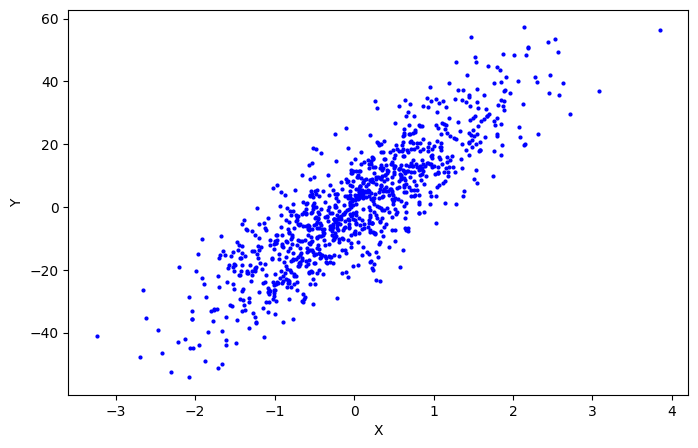

In [240]:
plt.figure(figsize=(8, 5))
plt.scatter(x, y, c='b', s=4)
plt.xlabel("X")
plt.ylabel("Y")

In [241]:
# convert to tensors

x_tensor= torch.from_numpy(x).type(torch.float32)
y_tensor= torch.from_numpy(y).type(torch.float32).unsqueeze(1)

In [242]:
# split

x_train, x_test, y_train, y_test = train_test_split(x_tensor, y_tensor, test_size=0.3, random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

(torch.Size([700, 1]),
 torch.Size([700, 1]),
 torch.Size([300, 1]),
 torch.Size([300, 1]))

In [243]:
class RegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1= nn.Linear(in_features=1, out_features=1)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer1(x)

In [244]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

(torch.Size([700, 1]),
 torch.Size([700, 1]),
 torch.Size([300, 1]),
 torch.Size([300, 1]))

In [245]:
torch.manual_seed(42)
model_regression= RegressionModel()

lossFn= nn.L1Loss()
optimizer= torch.optim.Adam(params=model_regression.parameters(), lr= 0.01)
epochs= 2000

for epoch in range(epochs):
    model_regression.train()
    
    y_train_pred= model_regression(x_train)
    
    loss= lossFn(y_train_pred, y_train)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    if epoch % 100 == 0: 
        model_regression.eval()
        with torch.inference_mode():
            y_test_pred= model_regression(x_test)
            test_loss= lossFn(y_test_pred, y_test)
            r_score= r2_score(y_test, y_test_pred)
            mae= mean_absolute_error(y_test , y_test_pred)
            print(f"Training loss: {loss} --------------- Test loss: {test_loss}")
            print(f"R^2 score: {r_score} ------------- MAE: {mae}")


Training loss: 14.631460189819336 --------------- Test loss: 14.725943565368652
R^2 score: 0.060891327995834854 ------------- MAE: 14.725943354616563
Training loss: 13.944968223571777 --------------- Test loss: 14.094429016113281
R^2 score: 0.14357244809469494 ------------- MAE: 14.094428678452969
Training loss: 13.281113624572754 --------------- Test loss: 13.497259140014648
R^2 score: 0.21602955639465526 ------------- MAE: 13.497258282452822
Training loss: 12.641915321350098 --------------- Test loss: 12.904291152954102
R^2 score: 0.28396977076122965 ------------- MAE: 12.904291673600675
Training loss: 12.043017387390137 --------------- Test loss: 12.345606803894043
R^2 score: 0.34377744770593777 ------------- MAE: 12.34560760781169
Training loss: 11.47110366821289 --------------- Test loss: 11.820452690124512
R^2 score: 0.3977609807049839 ------------- MAE: 11.820452214628459
Training loss: 10.94880199432373 --------------- Test loss: 11.324666023254395
R^2 score: 0.4469097748841805